In [1]:
import sys
import os

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser("__file__"))))
curator_app_dir = os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT))
#sys.path.append(curator_app_dir)
os.chdir(curator_app_dir)

from glob import glob
from annotation import Annotation
from modelingParameter import NumericalVariable, getParameterTypeFromID
from qtNeurolexTree import flatten_list
import pandas as pd
import numpy as np

In [2]:
annotations = []
for fileName in glob("/home/oreilly/Dropbox/code/curator_app/curator_DB/*.pcr"):
    try:
        annotations.extend(Annotation.readIn(open(fileName, "r", encoding="utf-8", errors='ignore')))
    except:       
        print("Skipping: ", fileName)    
        raise

In [3]:
annotData = {"Type":[], "Nb. of param.":[], "Text":[]}
for annot in annotations:
    annotData["Type"].append(annot.type)
    annotData["Nb. of param."].append(len(annot.parameters))
    annotData["Text"].append(annot.text)
annotData = pd.DataFrame(annotData)
    

In [4]:
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000
print(len(annotData))
annotData

113


,Nb. of param.,Text,Type
0,0,"Note that some of the\naction potentials in cells exhibiting spikelets (Fig. 12C) were\ninflected on the rising phase, suggesting an antidromic origin,\nas would be expected if some of the bursting activity involves\nan electrically coupled network of pyramidal cell axons (Cun-\nningham et al. 2004a).",text
1,0,"ustained firing of layer 4 spiny stellate neurons, and\nlayer 4 VFO, can occur in the model under at least 2 condi-\ntions: 1) high-conductance AMPA receptors at connections\nbetween layer 4 spiny stellates (Figs. 7B and 8), or 2) lower\nconductance AMPA receptors, together with rapid-time-\ncourse, relatively voltage-independent NMDA receptors, at\nconnections between spiny stellate cells",text
2,0,"Thalamic\ncells in higher-order nuclei have higher propensities to discharge in\nburst as compared with those in first-order nuclei (He & Hu, 2002;\nRamcharan et al., 2005; Wei et al., 2011).",text
3,0,"The receptive fields of the rostral and\ncaudal VPL are broad, while those of the intermediate\nVPL (processing cutaneous information) are restricted\nand finely somatotopically organized with the fore-\nlimbs represented medially and the hindlimbs laterally\n(Francis et al., 2008).",text
4,0,"The VPL and VPM are distinguishable not only by\ntheir connectivity but also on the basis of cyto- and\nchemoarchitectonics. In Nissl-stained material (Paxinos\nand Watson, 2014), VPM stands out by containing\nmore densely packed cells than either VPL or PO, but\nVPM exhibits low levels of acetylcholinesterase (AChE)\nactivity compared to moderate levels for VPL and the\nposterior complex. Most neurons in VPM and VPL are\nmedium-sized thalamocortically projecting cells. In contrast\nto other species, there are reportedly no GABAergic\nneurons in the VP complex of rats (Harris and Hendrickson,\n1987; Price, 1995; Sherman and Guillery, 2006). The\nneurons of VPL are arranged in rostrocaudal and dorsoventral\nrows that are roughly parallel to the external\nmedullary lamina; the rows curve partially around the\nrostral pole of VPM (McAllister and Wells, 1981).",text
5,0,"Thalamocortical axons from VPL/\nVPM terminate predominantly in layer 4 of the primary\nsensory cortex (S1) and use glutamate as a neurotransmitter\n(Kharazia and Weinberg, 1994). Apart from the\nmain terminations in layer 4, VPM axons also branch\nto layers 1 and 5/6 of S1 (Lu and Lin, 1993; Zhang and\nDesch\xeanes, 1998).",text
6,0,"The ventral posterolateral and ventral posteromedial\nnuclei receive main somatosensory inputs from the\ndorsal lamina of the spinal cord, dorsal column nuclei,\nand the trigeminal complex (Gauriau and Bernard, 2004;\nTracey, 2004; Waite, 2004; see also Somatosensory System,\nChapter 24).",text
7,0,"Spinothalamic fibers conveying nociceptive signals to\nthe thalamus originate from a relatively wide-ranging\nregion of the spinal cord, most heavily from lamina 1 of\nthe dorsal horn, and terminate as large boutons in VPL\n(McAllister and Wells, 1981; Burstein et al., 1990; Dado\net al., 1994; Katter et al., 1996; Kobayashi, 1998; Willis\net al., 2004). Nociceptive information also reaches VPL\nindirectly via several routes including from the caudal\nmedullary reticular formation (Villanueva et al., 1998).\nAfferents from the dorsal column nuclei to VPL also\nterminate as large boutons (McAllister and Wells, 1981;\nVillanueva et al., 1998).",text
8,0,"VPL is reportedly divided into\nrostral, intermediate, and caudal zones, which are distinct,\nessentially non-overlapping, regions processing\ndifferent types of modality specific information (Francis\net al., 2008). The rostral VPL mainly receives proprioceptive\ninput, the intermediate VPL receives cutaneous\nafferents, and the caudal VPL processes nociceptive and\nvisceral input.",text
9,0,"The VPL and VPM also receive afferents from other\nsubcortical regions, among them a serotonergic input\nfrom the dorsal raphe nucleus, and GABAergic afferents\nfrom the RT of th

In [5]:
parameters = flatten_list([[(param, annot) for param in annot.parameters] for annot in annotations])
parameters, paramAnnot = zip(*parameters)

paramDescType = [param.description.type for param in parameters]
paramTypes = [getParameterTypeFromID(param.description.depVar.typeId) for param in parameters]
paramTypeNames = [param.name for param in paramTypes]
paramValues = [param.description.depVar.values.text() if isinstance(param.description.depVar, NumericalVariable)
                                               else np.nan for param in parameters]

paramTypeIds = [param.ID for param in paramTypes]
reqTags      = [[tag.name for tag in param.requiredTags] if len(param.requiredTags) else "" for param in parameters]


print(len(paramTypes))
paramValues
pd.DataFrame({"Param":paramTypeNames, "Values":paramValues, "ID":paramTypeIds, "Req. Tag.":reqTags}).sort_values("ID")

69


,ID,Param,Req. Tag.,Values
4,BBP-002001,age,,[2 - 25]
5,BBP-002002,temperature,,[22 - 24]
0,BBP-002003,junction_potential,,8
39,BBP-010002,resting_membrane_potential,[Cell],-59.06 +/- 0.56 (n=36)
38,BBP-010002,resting_membrane_potential,[Cell],-58.41 +/- 0.74 (n=22)
50,BBP-011001,eq_potential_ion_curr,"[Thalamic reticular nucleus cell, Leak ionic current]",-53.6 +/- 3.9 (n=10)
46,BBP-011001,eq_potential_ion_curr,"[Thalamus relay cell, Leak ionic current]",-57.4 +/- 9.0 (n=10)
32,BBP-011001,eq_potential_ion_curr,"[Potassium current, Cell]",-100.0
30,BBP-011001,eq_potential_ion_curr,"[Potassium current, Cell]",-100.0
25,BBP-011001,eq_potential_ion_curr,"[Potassium current, Cell]",-45.0


In [6]:
from annotationSearch import ParameterSearch, ConditionAtom
from qtNeurolexTree import TreeData

searcher = ParameterSearch()
searcher.setSearchConditions(ConditionAtom("Parameter name", "conductance_ion_curr_max"))
searcher.expandRequiredTags = True
searcher.onlyCentralTendancy = True

result = searcher.search()
print(result)

                                                 Cell Parameter ID  \
0                     Thalamic reticular nucleus cell   BBP-030003   
1                                                Cell   BBP-030003   
2                                                Cell   BBP-030003   
3                     Thalamic reticular nucleus cell   BBP-030003   
4                                                Cell   BBP-030003   
5                                                Cell   BBP-030003   
6                                 Thalamus relay cell   BBP-030003   
7                                                Cell   BBP-030003   
8                                                Cell   BBP-030003   
9   Thalamus ventroposterior nucleus principal neuron   BBP-030003   
10                                               Cell   BBP-030003   
11                                Thalamus relay cell   BBP-030003   
12                                               Cell   BBP-030003   
13                  

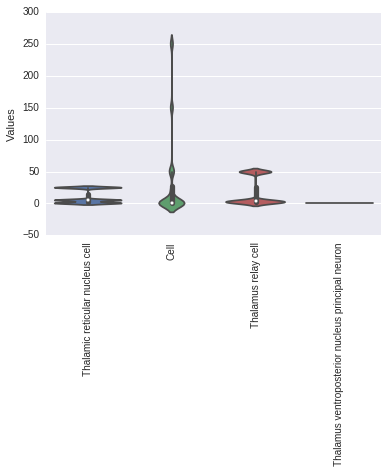

In [14]:
%matplotlib inline

import seaborn as sns
g = sns.violinplot(x="Cell", y="Values", data=result, bw=0.1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("")

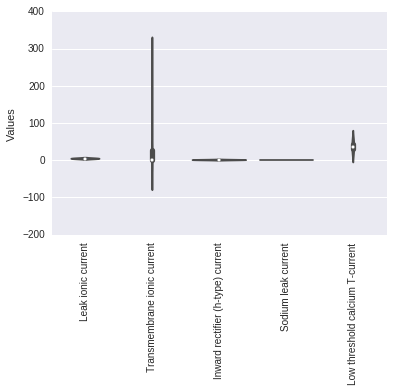

In [13]:
%matplotlib inline

import seaborn as sns
g = sns.violinplot(x="Transmembrane ionic current", y="Values", data=result)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("")